In [1]:
# Import libaries and dependencies #
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data & convert to dataframe
batting_data_load = "../Project_01/CHC_batting.csv"
batting_data_0 = pd.read_csv(batting_data_load)
batting_data_0.head()

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No


In [3]:
# take out outliers from batting data "At_Bats"         
filtered_players = batting_data_0.loc[batting_data_0["At_Bats"] >= 50]   # should be 2735 rows
filtered_players

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,6,1876,OF,Bob Addy,34,32,147,142,36,40,...,0.630,102,46,0,0,0,0,0,Left,No
5236,7,1876,OF,John Glenn,26,66,288,276,55,84,...,0.685,120,97,0,0,0,0,0,Right,No
5237,8,1876,OF,Paul Hines,21,64,306,305,62,101,...,0.773,146,134,0,0,0,0,0,Right,No
5238,9,1876,OF,Oscar Bielaski,29,32,141,139,24,29,...,0.450,44,32,0,0,0,0,0,Right,No


In [4]:
# Import data & convert to dataframe
pitching_data_load = "../Project_01/CHC_pitching.csv"
pitching_data = pd.read_csv(pitching_data_load)
pitching_data.head()

,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
1,2,2023,SP,Jameson Taillon,31,8,10,0.444,4.84,30,...,93,4.61,1.276,9.1,1.6,2.4,8.2,3.41,Right,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
3,4,2023,SP,Kyle Hendricks,33,6,8,0.429,3.74,24,...,120,3.81,1.204,9.1,0.9,1.8,6.1,3.44,Right,No
4,5,2023,SP,Marcus Stroman,32,10,9,0.526,3.95,27,...,113,3.58,1.259,7.9,0.6,3.4,7.8,2.29,Right,No


In [5]:
# Explore data

# print("General info about batting:")
# print(batting_data.shape)
# print(batting_data.columns)
# print(batting_data.dtypes)

# print("General info about pitching:")
# print(pitching_data.shape)
# print(pitching_data.columns)
# pitching_data.dtypes

In [6]:
# # Convert object to string
# batting_data['Position'] = batting_data['Position'].astype("string")
# print(batting_data['Position'].dtype)

In [7]:
# # Convert object to string
# pitching_data['Dominant_Hand'] = pitching_data['Dominant_Hand'].astype("string")
# print(pitching_data['Dominant_Hand'].dtype)

In [8]:
# Check for missing values
# print(batting_data.isna().sum())             
# print(pitching_data.isna().sum())

In [9]:
# There are nans in the Position column. List the batting positions.
# batting_data["Position"].unique()

In [10]:
# # Drop the rows with missing Position.
# batting_position_clean = batting_data.dropna()
# batting_position_clean

In [11]:
# # Confirm the rows with missing Position were dropped.
# print(len(batting_data))
# print(len(batting_position_clean))
# print(len(batting_data) - len(batting_position_clean))
# print(batting_position_clean.isna().sum())
# batting_position_clean["Position"].unique() 

In [12]:
# # duplicates: Since the players are listed by rank, each player should only appear once per year. 
# # Confirm that there are no duplicates.
# duplicate_players = batting_data.loc[batting_data.duplicated(['Name','Year']), "Name"].unique()
# print(duplicate_players)

In [13]:
# Confirm there are no outliers to skew our data results?

In [14]:
# Initial data exploration:
# sum stats

# visualizations for potential relationships (-> regression)

In [15]:
# # Visualizations for Age & Performance
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Runs"])
# regress_values = batting_data["Age"] * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(f"The r-value is {rvalue**2}.")
# plt.scatter(batting_data["Age"],batting_data["Runs"], alpha=0.25)
# plt.plot(batting_data["Age"],regress_values,"r-")
# plt.xlabel("Age")
# plt.ylabel("Runs")
# plt.annotate(line_eq,(10,20),fontsize=15,color="red")
# plt.show()

# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Hits"])
# regress_values = batting_data["Age"] * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(f"The r-value is {rvalue**2}.")
# plt.scatter(batting_data["Age"],batting_data["Hits"], alpha=0.25)
# plt.plot(batting_data["Age"],regress_values,"r-")
# plt.xlabel("Age")
# plt.ylabel("Hits")
# plt.annotate(line_eq,(10,20),fontsize=15,color="red")
# plt.show()

# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Doubles"])
# regress_values = batting_data["Age"] * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(f"The r-value is {rvalue**2}.")
# plt.scatter(batting_data["Age"],batting_data["Doubles"], alpha=0.25)
# plt.plot(batting_data["Age"],regress_values,"r-")
# plt.xlabel("Age")
# plt.ylabel("Doubles")
# plt.annotate(line_eq,(10,20),fontsize=15,color="red")
# plt.show()

# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Triples"])
# regress_values = batting_data["Age"] * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(f"The r-value is {rvalue**2}.")
# plt.scatter(batting_data["Age"],batting_data["Triples"], alpha=0.25)
# plt.plot(batting_data["Age"],regress_values,"r-")
# plt.xlabel("Age")
# plt.ylabel("Runs")
# plt.annotate(line_eq,(10,20),fontsize=15,color="red")
# plt.show()

# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Home_Runs"])
# regress_values = batting_data["Age"] * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(f"The r-value is {rvalue**2}.")
# plt.scatter(batting_data["Age"],batting_data["Home_Runs"], alpha=0.25)
# plt.plot(batting_data["Age"],regress_values,"r-")
# plt.xlabel("Age")
# plt.ylabel("Home Runs")
# plt.annotate(line_eq,(10,20),fontsize=15,color="red")
# plt.show()

# print("Age does not predict performance.")

## Research Question #3:
### Does player position have an impact on batter performance? 

We will compare the player’s position to their runs batted, bases stolen, and home runs.

#### Preliminary visualizations to assess player position and batter performance:

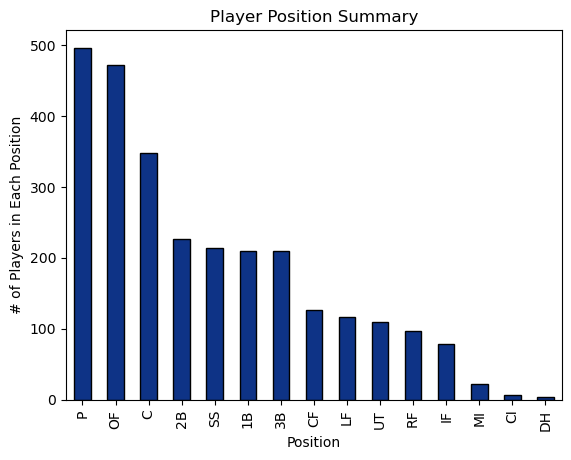

First, we observe that there are many more players in the Pitcher position than all other positions,
      so there is potential for this to skew the comparisons. 
      For example, because there are so many pitchers, 
      will we be able to glean accurate insight on how player position impacts the number of home runs, 
      if the pitcher position always has the most home runs simply due to the number of players?
      
      Next we look at three measures of performance for each position.


In [16]:
# Player Position Summary: The number of players in each position
position_total = filtered_players["Position"].value_counts()
position_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# of Players in Each Position',
                    title="Player Position Summary",
                    color='#0E3386',
                    edgecolor='black')
plt.savefig("Figures/Player_Position_Summary.png")
plt.show()

print("""First, we observe that there are many more players in the Pitcher position than all other positions,
      so there is potential for this to skew the comparisons. 
      For example, because there are so many pitchers, 
      will we be able to glean accurate insight on how player position impacts the number of home runs, 
      if the pitcher position always has the most home runs simply due to the number of players?
      
      Next we look at three measures of performance for each position.""")

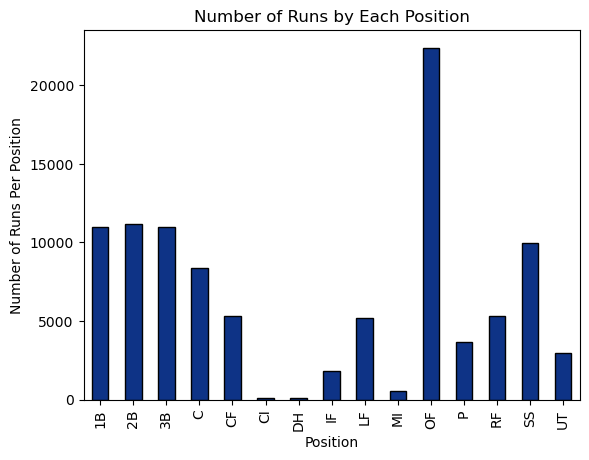

This eases our concern about the pitchers automatically having the 
      largest number of runs batted, but we observe that the next most common positions,
      outfielders, catchers, and first, second, and third basemen,
      also have the largest number of runs batted.
      
      
      
      


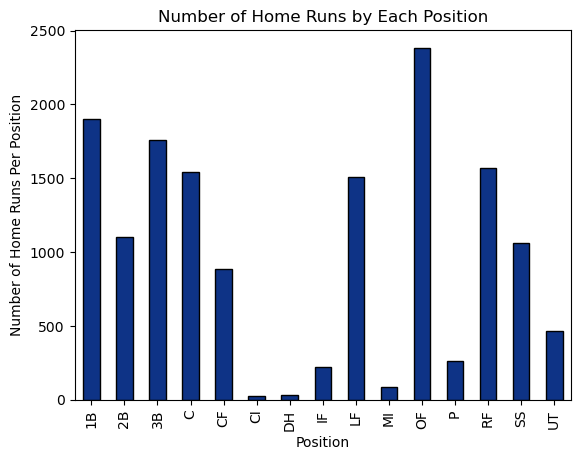

We notice a similar concern as the number of runs batted.  
      However, left- and right-fielders, positions that have a relatively
      small number of players,  score a competitive number of home runs.
      
      
      
      


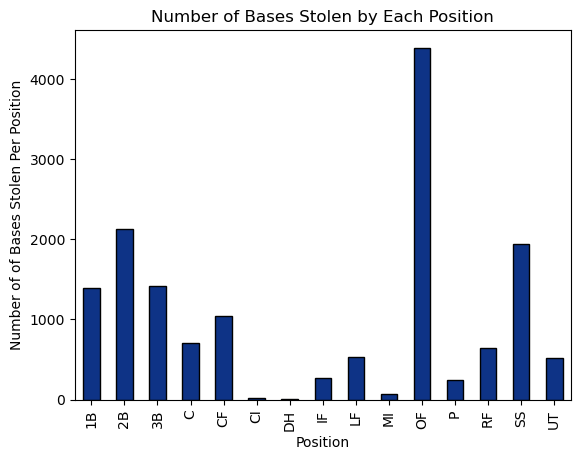

Outfielders, the second largest position category, perform well again. Shortstops
      perform comparatively well for the number of players.
      

      However, the positions that contain the fewest players
      (Corner Infield, Middle Infield, and Designated Hitter)
      consistenly have the lowest count for each measure of performance. 


      Further analysis is needed to determine a better measure of comparison.
      
      
      
      


In [28]:
# Number of Runs Batted by Each Position
position_runs_total = filtered_players.groupby(["Position"])["Runs"].sum()
position_runs_total.head()
position_runs_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='Number of Runs Per Position',
                    title="Number of Runs by Each Position",
                    color='#0E3386',
                    edgecolor='black')
plt.show()
print("""This eases our concern about the pitchers automatically having the 
      largest number of runs batted, but we observe that the next most common positions,
      outfielders, catchers, and first, second, and third basemen,
      also have the largest number of runs batted.
      
      
      
      """)


# Number of Home Runs by Each Position
position_homeruns_total = filtered_players.groupby(["Position"])["Home_Runs"].sum()
position_homeruns_total.head()
position_homeruns_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='Number of Home Runs Per Position',
                    title="Number of Home Runs by Each Position",
                    color='#0E3386',
                    edgecolor='black')
plt.savefig("Figures/Homeruns_Sum.png")
plt.show()
print("""We notice a similar concern as the number of runs batted.  
      However, left- and right-fielders, positions that have a relatively
      small number of players,  score a competitive number of home runs.
      
      
      
      """)


# Number of Bases Stolen by Each Position
position_basesstolen_total = filtered_players.groupby(["Position"])["Stolen_Bases"].sum()
position_basesstolen_total.head()
position_basesstolen_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='Number of of Bases Stolen Per Position',
                    title="Number of Bases Stolen by Each Position",
                    color='#0E3386',
                    edgecolor='black')
plt.show()
print("""Outfielders, the second largest position category, perform well again. Shortstops
      perform comparatively well for the number of players.
      

      However, the positions that contain the fewest players
      (Corner Infield, Middle Infield, and Designated Hitter)
      consistenly have the lowest count for each measure of performance. 


      Further analysis is needed to determine a better measure of comparison.
      
      
      
      """)

#### Further analysis to assess player position and batter performance:

To control for the number of players in each position, we will divide each performance measure by the number of players in each position.

In [18]:
### Set up for calculation:

# Confirm data structures
print(type(position_total))
print(type(position_runs_total))


# The position total index does not match the indices of the 
#   other Series in the comparison, so it will need to be changed.
print(position_total)
print(position_runs_total)


# For the series containing The number of players in each position,
#   sort the index so that it matches  (alphabetical)
position_count = position_total.sort_index()
position_count


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
Position
P     496
OF    472
C     348
2B    227
SS    213
1B    210
3B    209
CF    126
LF    117
UT    110
RF     97
IF     78
MI     22
CI      6
DH      4
Name: count, dtype: int64
Position
1B    10956
2B    11190
3B    10992
C      8397
CF     5346
CI      121
DH       98
IF     1850
LF     5192
MI      565
OF    22397
P      3644
RF     5298
SS     9995
UT     2948
Name: Runs, dtype: int64


Position
1B    210
2B    227
3B    209
C     348
CF    126
CI      6
DH      4
IF     78
LF    117
MI     22
OF    472
P     496
RF     97
SS    213
UT    110
Name: count, dtype: int64

In [19]:
### Perform calculations:

# The number of ________ for that position / the number of players in that position 
#       = the average number of ________ per player in that position


# Average number of runs batted by each position:
runs_batted_avg_byposition = position_runs_total / position_count
print("Avg Runs batted:")
print(runs_batted_avg_byposition)

# Average number of homeruns by each position:
homeruns_avg_by_position = position_homeruns_total / position_count
print("Avg Homeruns:")
print(homeruns_avg_by_position)


# Average number of bases stolen by each position:
bases_stolen_avg_by_position = position_basesstolen_total / position_count
print("Avg Bases stolen:")
print(bases_stolen_avg_by_position)

Avg Runs batted:
Position
1B    52.171429
2B    49.295154
3B    52.593301
C     24.129310
CF    42.428571
CI    20.166667
DH    24.500000
IF    23.717949
LF    44.376068
MI    25.681818
OF    47.451271
P      7.346774
RF    54.618557
SS    46.924883
UT    26.800000
dtype: float64
Avg Homeruns:
Position
1B     9.057143
2B     4.845815
3B     8.425837
C      4.428161
CF     7.007937
CI     4.500000
DH     8.500000
IF     2.846154
LF    12.871795
MI     3.727273
OF     5.052966
P      0.524194
RF    16.195876
SS     4.985915
UT     4.209091
dtype: float64
Avg Bases stolen:
Position
1B    6.628571
2B    9.361233
3B    6.803828
C     2.020115
CF    8.325397
CI    3.166667
DH    1.500000
IF    3.384615
LF    4.538462
MI    3.363636
OF    9.309322
P     0.481855
RF    6.628866
SS    9.117371
UT    4.763636
dtype: float64


In [20]:
# Convert the individual series into a single dataframe
averages_data = pd.DataFrame({'Avg Runs':runs_batted_avg_byposition,
                                'Avg Homeruns':homeruns_avg_by_position,
                                'Avg Bases Stolen':bases_stolen_avg_by_position})
averages_data


### May not need if look at each performance measure individually

,Avg Runs,Avg Homeruns,Avg Bases Stolen
Position,,,
1B,52.171429,9.057143,6.628571
2B,49.295154,4.845815,9.361233
3B,52.593301,8.425837,6.803828
C,24.129310,4.428161,2.020115
CF,42.428571,7.007937,8.325397
CI,20.166667,4.500000,3.166667
DH,24.500000,8.500000,1.500000
IF,23.717949,2.846154,3.384615
LF,44.376068,12.871795,4.538462


In [21]:
### We want a way to visualize how well a position performs compared to how common the position is.
# Designate the index of our Dataframe to be in descending order of position popularity
index_array = position_total.index
index_series = pd.Series(index_array, name='Position')
index_series

0      P
1     OF
2      C
3     2B
4     SS
5     1B
6     3B
7     CF
8     LF
9     UT
10    RF
11    IF
12    MI
13    CI
14    DH
Name: Position, dtype: object

In [22]:
#Display the dataframe to confirm
averages_data_by_position_count = averages_data.reindex(index=index_series)
averages_data_by_position_count

,Avg Runs,Avg Homeruns,Avg Bases Stolen
Position,,,
P,7.346774,0.524194,0.481855
OF,47.451271,5.052966,9.309322
C,24.129310,4.428161,2.020115
2B,49.295154,4.845815,9.361233
SS,46.924883,4.985915,9.117371
1B,52.171429,9.057143,6.628571
3B,52.593301,8.425837,6.803828
CF,42.428571,7.007937,8.325397
LF,44.376068,12.871795,4.538462


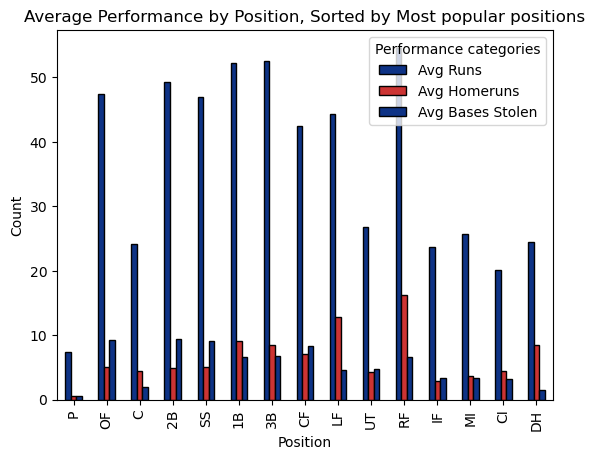

In [23]:
# Plot the averages data BUT with the player position count starting at left as in original figure
averages_data_by_position_count_plot = averages_data_by_position_count.plot(kind='bar', stacked=False,
                                        color=['#0E3386','#CC3433'],
                                        edgecolor='black')          # need to figure out how to move legend
averages_data_by_position_count_plot.legend(loc='center', bbox_to_anchor=(1.0, 0.5))
plt.title('Average Performance by Position, Sorted by Most popular positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.legend(title='Performance categories')
plt.savefig("Figures/Avg_Performance_Sorted.png")
plt.show()

### May not use this if we look at each measure individually

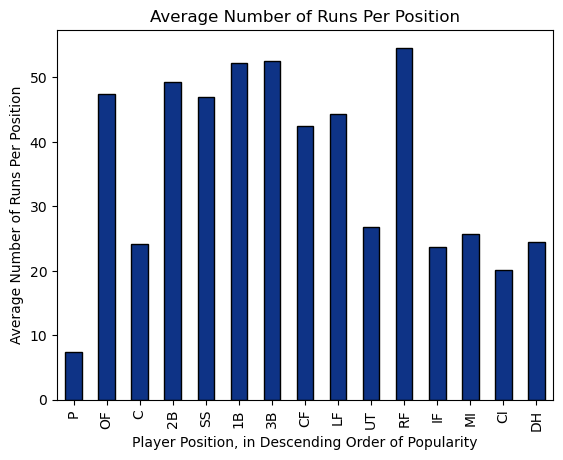

In [24]:
# Plot the averages data BUT with the player position count starting at left as in original figure
# Runs
averages_data_by_position_count["Avg Runs"].plot(kind='bar',
                                        stacked=False,
                                        color='#0E3386',
                                        edgecolor='black',
                                        legend=None
                                        )          
plt.title('Average Number of Runs Per Position')
plt.xlabel('Player Position, in Descending Order of Popularity')
plt.ylabel('Average Number of Runs Per Position')
plt.savefig("Figures/Avg_Performance_Runs.png")
plt.show()

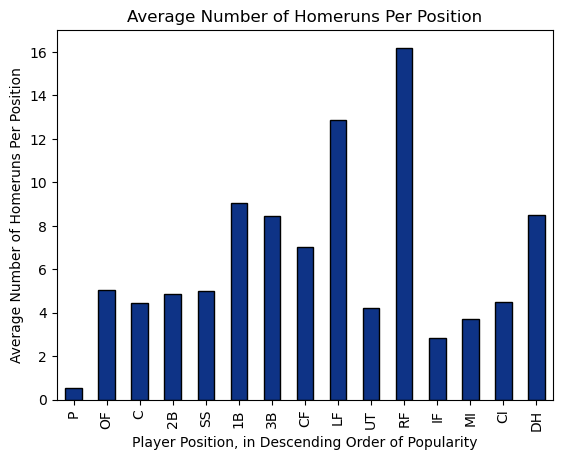

In [25]:
# Plot the averages data BUT with the player position count starting at left as in original figure
# Home runs
averages_data_by_position_count["Avg Homeruns"].plot(kind='bar',
                                        stacked=False,
                                        color='#0E3386',
                                        edgecolor='black',
                                        legend=None
                                        )          
plt.title('Average Number of Homeruns Per Position')
plt.xlabel('Player Position, in Descending Order of Popularity')
plt.ylabel('Average Number of Homeruns Per Position')
plt.savefig("Figures/Avg_Performance_HomeRuns.png")
plt.show()

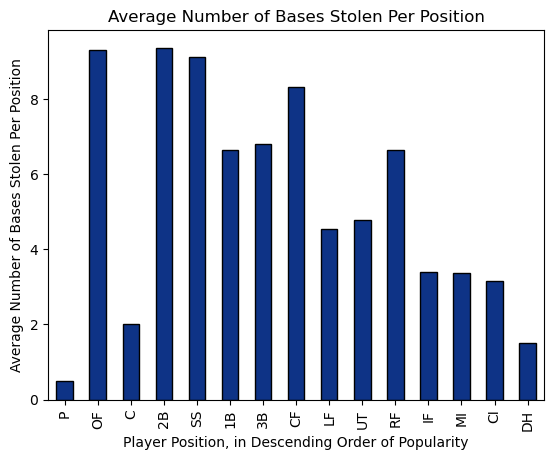

In [26]:
# Plot the averages data BUT with the player position count starting at left as in original figure
# Bases Stolen
averages_data_by_position_count["Avg Bases Stolen"].plot(kind='bar',
                                        stacked=False,
                                        color='#0E3386',
                                        edgecolor='black',
                                        legend=None
                                        )          
plt.title('Average Number of Bases Stolen Per Position')
plt.xlabel('Player Position, in Descending Order of Popularity')
plt.ylabel('Average Number of Bases Stolen Per Position')
plt.savefig("Figures/Avg_Performance_BasesStolen.png")
plt.show()

In [27]:
#########

# Look for outliers in all three performance categories (then drop from analysis?)
runs_batted_sumstat = batting_data["At_Bats"].describe()
homeruns_sumstat = batting_data["Home_Runs"].describe()
bases_stolen_sumstat = batting_data["Stolen_Bases"].describe()

q3_sumstat_data = pd.DataFrame({'At Bats':runs_batted_sumstat.map("{:,.0f}".format),
                                'Homeruns':homeruns_sumstat.map("{:,.0f}".format),
                                'Bases Stolen':bases_stolen_sumstat.map("{:,.0f}".format)})
q3_sumstat_data


NameError: name 'batting_data' is not defined

<Axes: >

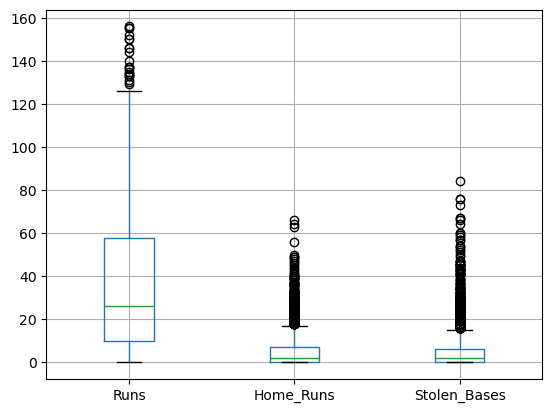

In [ ]:
batting_data[["Runs", "Home_Runs", "Stolen_Bases"]].boxplot()

# Filter??
### If so, I need to filter runs
# our data says: Of the players who went to bat >= 50 times,
#  this is the spread of home runs and bases stolen:


<Axes: >

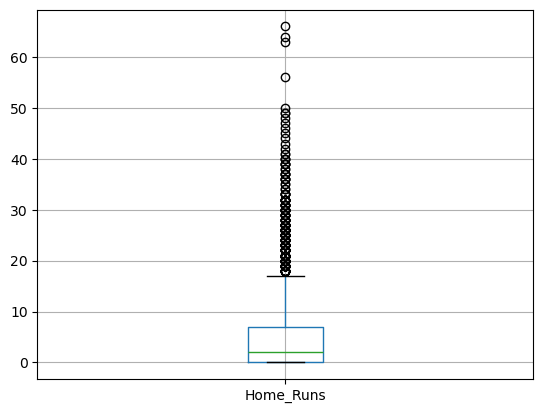

In [ ]:
batting_data[["Home_Runs"]].boxplot()


<Axes: >

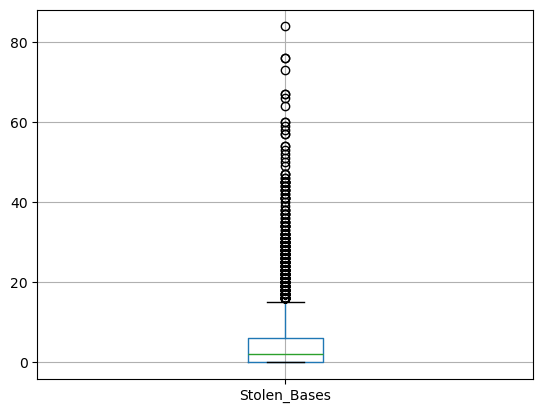

In [ ]:
batting_data[["Stolen_Bases"]].boxplot()


<Axes: >

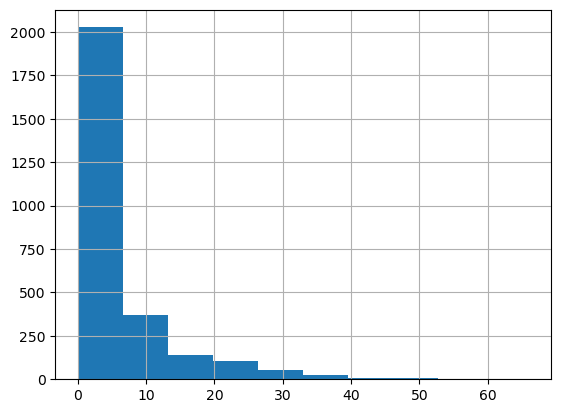

In [ ]:
batting_data["Home_Runs"].hist()
# remove players with outliers?


In [ ]:
quantile1_hr = batting_data["Home_Runs"].quantile(0.25)
quantile3_hr = batting_data["Home_Runs"].quantile(0.75)
iqr_hr = quantile3_hr - quantile1_hr

upper_limit_hr = quantile3_hr+1.5*iqr_hr

batting_data_hrfilter = batting_data.loc[batting_data["Home_Runs"] < upper_limit_hr]
batting_data_hrfilter

#went from 2735 observations to 2510 observations
# of the players who had >50 at bats AND were not exceptional @ home runs, :

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No
9,10,2023,CF,Mike Tauchman,32,108,401,337,64,85,...,0.739,100,127,3,4,1,3,1,Left,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,6,1876,OF,Bob Addy,34,32,147,142,36,40,...,0.630,102,46,0,0,0,0,0,Left,No
5236,7,1876,OF,John Glenn,26,66,288,276,55,84,...,0.685,120,97,0,0,0,0,0,Right,No
5237,8,1876,OF,Paul Hines,21,64,306,305,62,101,...,0.773,146,134,0,0,0,0,0,Right,No
5238,9,1876,OF,Oscar Bielaski,29,32,141,139,24,29,...,0.450,44,32,0,0,0,0,0,Right,No


<Axes: >

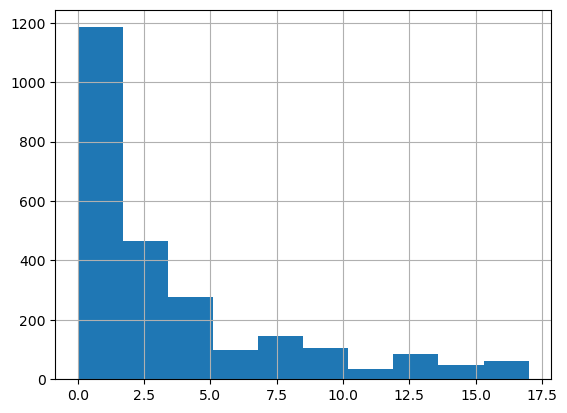

In [ ]:
batting_data_hrfilter["Home_Runs"].hist()

Avg Homeruns:
                  0
Position           
P          0.524194
OF         5.052966
C          4.428161
2B         4.845815
SS         4.985915
1B         9.057143
3B         8.425837
CF         7.007937
LF        12.871795
UT         4.209091
RF        16.195876
IF         2.846154
MI         3.727273
CI         4.500000
DH         8.500000


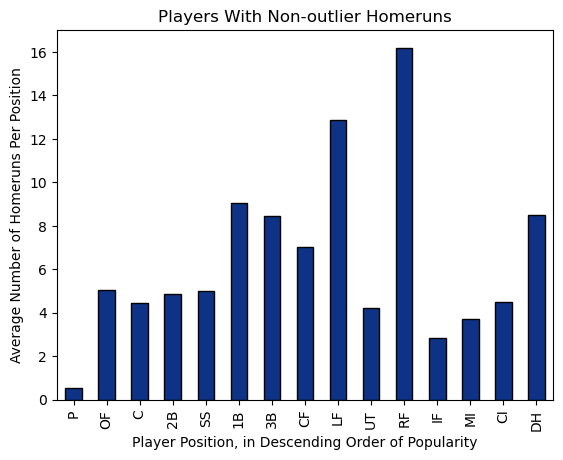

In [ ]:
# Plot the averages data BUT with the player position count starting at left as in original figure
# and with removing outliers

# Home Runs

#Need to recalculate averages and reset the index:
# Average number of homeruns by each position:
position_homeruns_total_filter = batting_data_hrfilter.groupby(["Position"])["Home_Runs"].sum()

homeruns_avg_by_position_filter = position_homeruns_total / position_count
homeruns_avg_by_position_filter = pd.DataFrame(homeruns_avg_by_position_filter).reindex(index=index_series)
print("Avg Homeruns:")
print(homeruns_avg_by_position_filter)



homeruns_avg_by_position_filter.plot(kind='bar',
                                        stacked=False,
                                        color='#0E3386',
                                        edgecolor='black',
                                        legend=None
                                        )          
plt.title('Players With Non-outlier Homeruns')
plt.xlabel('Player Position, in Descending Order of Popularity')
plt.ylabel('Average Number of Homeruns Per Position')
plt.savefig("Figures/Avg_Performance_Homeruns_filtered.png")
plt.show()

In [ ]:
# graph looks basically the same as before outliers were removed

<Axes: >

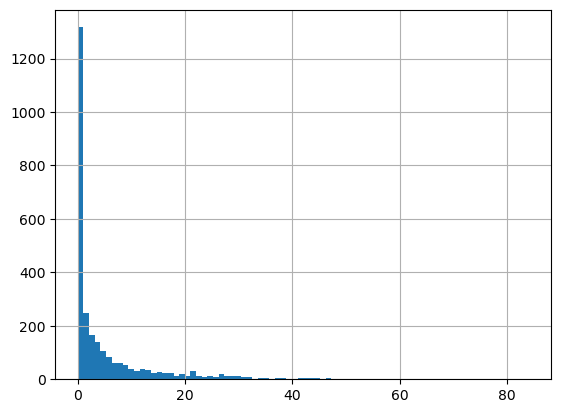

In [ ]:
batting_data["Stolen_Bases"].hist(bins=80)
# remove players with outliers ?

In [ ]:
quantile1_bs = batting_data["Stolen_Bases"].quantile(0.25)
quantile3_bs = batting_data["Stolen_Bases"].quantile(0.75)
iqr_bs = quantile3_bs - quantile1_bs

upper_limit_bs = quantile3_bs+1.5*iqr_bs

batting_data_bsfilter = batting_data.loc[batting_data["Home_Runs"] < upper_limit_bs]
batting_data_bsfilter

#went from 2735 observations to 2428 observations
# of the players who had >50 at bats AND were not exceptional @ stealing bases, :

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No
9,10,2023,CF,Mike Tauchman,32,108,401,337,64,85,...,0.739,100,127,3,4,1,3,1,Left,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,6,1876,OF,Bob Addy,34,32,147,142,36,40,...,0.630,102,46,0,0,0,0,0,Left,No
5236,7,1876,OF,John Glenn,26,66,288,276,55,84,...,0.685,120,97,0,0,0,0,0,Right,No
5237,8,1876,OF,Paul Hines,21,64,306,305,62,101,...,0.773,146,134,0,0,0,0,0,Right,No
5238,9,1876,OF,Oscar Bielaski,29,32,141,139,24,29,...,0.450,44,32,0,0,0,0,0,Right,No


Avg bases stolen:
                 0
Position          
P         0.481855
OF        8.531780
C         1.887931
2B        7.938326
SS        8.305164
1B        5.485714
3B        6.095694
CF        6.444444
LF        2.572650
UT        4.554545
RF        2.608247
IF        3.371795
MI        2.909091
CI        3.166667
DH        0.000000


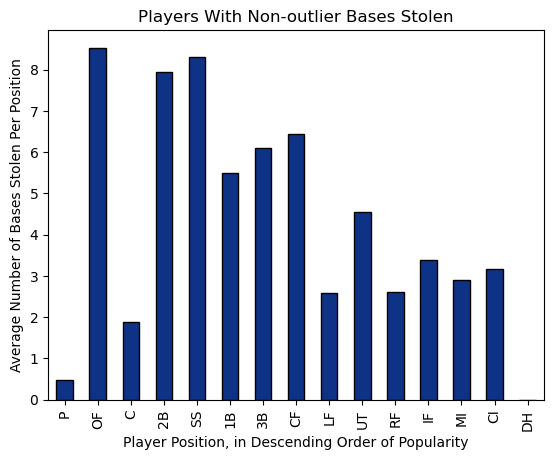

In [ ]:
# Plot the averages data BUT with the player position count starting at left as in original figure
# and with removing outliers

# Bases stolen

#Need to recalculate averages and reset the index:
# Average number of homeruns by each position:
position_bs_total_filter = batting_data_bsfilter.groupby(["Position"])["Stolen_Bases"].sum()

bs_avg_by_position_filter = position_bs_total_filter / position_count
bs_avg_by_position_filter = pd.DataFrame(bs_avg_by_position_filter).reindex(index=index_series)
print("Avg bases stolen:")
print(bs_avg_by_position_filter)



bs_avg_by_position_filter.plot(kind='bar',
                                        stacked=False,
                                        color='#0E3386',
                                        edgecolor='black',
                                        legend=None
                                        )          
plt.title('Players With Non-outlier Bases Stolen')
plt.xlabel('Player Position, in Descending Order of Popularity')
plt.ylabel('Average Number of Bases Stolen Per Position')
plt.savefig("Figures/Avg_Performance_BasesStolen_filtered.png")
plt.show()

In [ ]:
# from the figure it looks like outliers for BS were primarily coming from DH,
# which makes sense if they are chosen to bat in place of another player?

In [ ]:
# Are there players that keep performing / performing exceptionally year after year?

# Accounting for Games
# Does "Games" column mean number of games the player played that season? or career cumulative?
# Games would be precursor to At_Bats, Homeruns, and Stealing Bases
# baseball's extended season is 162 games

# My analyzation would become:
# Average number of Bases Stolen Per per game, per position  ?? 
    # So remove players with 0 games, or lower whisker number of games?


# column for average number of homeruns per game, at top
# then check for outliers, perform averages, look at charts


## Does a pitcher's overall performance impact game losses and wins?

In [ ]:
# Does a player's dominant hand have an impact on the player's performance?


# All right-handed players:
pitching_data_right = pitching_data.loc[pitching_data["Dominant_Hand"] ==  "Right"]
pitching_data_right.head()

# All left-handed players:
pitching_data_left = pitching_data.loc[pitching_data["Dominant_Hand"] ==  "Left"]
pitching_data_left.head()



,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
12,13,2023,NaN,Jordan Wicks,23,4,1,0.800,4.41,7,...,102,4.70,1.269,8.6,1.3,2.9,6.2,2.18,Left,No
17,18,2023,NaN,Brandon Hughes,27,0,3,0.000,7.24,17,...,63,4.65,1.610,9.2,1.3,5.3,11.2,2.13,Left,No
18,19,2023,NaN,Anthony Kay,28,0,0,0.000,6.35,13,...,73,5.37,1.765,9.5,0.8,6.4,6.4,1.00,Left,No


In [ ]:
# Look at Strikeouts_Per_Nine_Innings

strikeouts_right_mean = pitching_data_right["Strikeouts_Per_Nine_Innings"].mean()
strikeouts_right_median = pitching_data_right["Strikeouts_Per_Nine_Innings"].median()
strikeouts_right_std = pitching_data_right["Strikeouts_Per_Nine_Innings"].std()

In [ ]:
strikeouts_left_mean = pitching_data_left["Strikeouts_Per_Nine_Innings"].mean()
strikeouts_left_median = pitching_data_left["Strikeouts_Per_Nine_Innings"].median()
strikeouts_left_std = pitching_data_left["Strikeouts_Per_Nine_Innings"].std()

In [ ]:
strikeouts_byhand_summary_r = {
                    'Average': strikeouts_right_mean,            
                    'Median': strikeouts_right_median,      
                    'Std. Dev.': strikeouts_right_std      
                    }

strikeouts_byhand_summary_rt = pd.DataFrame(strikeouts_byhand_summary_r, index=['Right-handed'])
strikeouts_byhand_summary_rt

,Average,Median,Std. Dev.
Right-handed,5.232828,4.7,2.987241


In [ ]:
strikeouts_byhand_summary_l = {
                    'Average': strikeouts_left_mean,            
                    'Median': strikeouts_left_median,      
                    'Std. Dev.': strikeouts_left_std      
                    }

strikeouts_byhand_summary_lt = pd.DataFrame(strikeouts_byhand_summary_l, index=['Left-handed'])
strikeouts_byhand_summary_lt

,Average,Median,Std. Dev.
Left-handed,5.738079,5.3,3.324458


In [ ]:
# stikeouts_byhand_summary = pd.concat([strikeouts_byhand_summary_rt,strikeouts_byhand_summary_lt], ignore_index=False)


In [ ]:
# strikeouts_byhand_summary

<Axes: ylabel='Dominant Hand'>

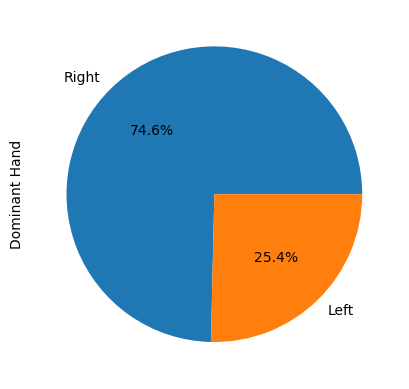

In [ ]:
# Pie chart of right vs left-handed
dominant_hand_comparison = pitching_data["Dominant_Hand"].value_counts()
dominant_hand_comparison.plot(
                        kind='pie',
                        ylabel='Dominant Hand',
                        autopct="%1.1f%%")

In [ ]:
pitching_data["Innings_Pitched"].describe()

count    2298.000000
mean       85.664143
std        90.662118
min         0.000000
25%        14.000000
50%        53.600000
75%       138.100000
max       623.000000
Name: Innings_Pitched, dtype: float64

In [ ]:
pitching_data_filtered = pitching_data.loc[pitching_data["Innings_Pitched"] >= 9]
pitching_data_filtered

,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
1,2,2023,SP,Jameson Taillon,31,8,10,0.444,4.84,30,...,93,4.61,1.276,9.1,1.6,2.4,8.2,3.41,Right,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
3,4,2023,SP,Kyle Hendricks,33,6,8,0.429,3.74,24,...,120,3.81,1.204,9.1,0.9,1.8,6.1,3.44,Right,No
4,5,2023,SP,Marcus Stroman,32,10,9,0.526,3.95,27,...,113,3.58,1.259,7.9,0.6,3.4,7.8,2.29,Right,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,2,1877,SP,Cal McVey,27,4,8,0.333,4.50,17,...,67,3.05,1.522,12.6,0.2,1.1,2.0,1.82,Right,No
2290,3,1877,SP,Laurie Reis,18,3,1,0.750,0.75,4,...,402,3.09,0.972,7.3,0.3,1.5,2.8,1.83,Right,No
2291,4,1877,RP,Al Spalding,26,0,0,0.000,3.27,4,...,95,2.48,1.545,13.9,0.0,0.0,1.6,0.00,Right,No
2293,1,1876,SP,Al Spalding,25,47,12,0.797,1.75,61,...,137,2.38,1.074,9.2,0.1,0.4,0.7,1.50,Right,No
